# "Install pynini on Colab"
> "This took a while"

- toc: false
- branch: master
- comments: true
- categories: [colab, pynini]

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:39
🔁 Restarting kernel...


In [ ]:
%%capture
!conda install -c conda-forge pynini

In [ ]:
%%capture
!pip install pyicu

In [1]:
import pynini

In [2]:
import icu
formatter = icu.RuleBasedNumberFormat(icu.URBNFRuleSetTag.SPELLOUT, icu.Locale('ga'))

In [5]:
for i in range(0, 10):
  print(formatter.format(i))

a náid
a haon
a dó
a trí
a ceathair
a cúig
a sé
a seacht
a hocht
a naoi


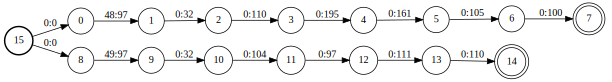

In [16]:
pynini.cross("0", "a náid") | pynini.cross("1", "a haon")

In [10]:
i = 1
print(f"{i:03d}")

001


In [3]:
count_1_999 = pynini.union(*[pynini.cross(f"{i:03d}", formatter.format(i)) for i in range(1, 1000)])

In [4]:
count_1_999_x1000 = pynini.union(*[pynini.cross(f"{i:03d}", formatter.format(i * 1000)) for i in range(1, 1000)])

In [10]:
("999" @ count_1_999_x1000).string()

'naoi gcéad nócha is naoi míle'

In [11]:
count_1_999_x1000000 = pynini.union(*[pynini.cross(f"{i:03d}", formatter.format(i * 1000000)) for i in range(1, 1000)])

In [13]:
drop_000 = pynini.cross("000", "")

In [18]:
ins_space = pynini.cross("", " ")

In [24]:
ins_space_or_is = (pynini.cross("", " ") | pynini.cross("", " is "))

In [12]:
("999" @ count_1_999_x1000000).string()

'naoi gcéad nócha is naoi milliún'

In [41]:
count_1_999999 = (count_1_999_x1000 + drop_000 | count_1_999_x1000 + ins_space + count_1_999 | drop_000 + count_1_999)

In [44]:
("000001" @ count_1_999999).string()

'a haon'

In [28]:
#count_1_999999 = (count_1_999_x1000 + drop_000 | count_1_999_x1000 + ins_space_or_is + count_1_999)

In [27]:
#("999999" @ count_1_999999).string()

In [ ]:
#count_0_rbnfmax = pynini.union(*[pynini.cross(f"{i:03d}", formatter.format(i)) for i in range(0, 1000000000000000000)])
count_0_1000000000000 = pynini.union(*[pynini.cross(f"{i:03d}", formatter.format(i)) for i in range(0, 1000000000000)])